In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.15.0


## Prepare Dataset

In [3]:
# train_dataset_path = './dataset/dataset-raw-asli/train_preprocess.tsv'
# valid_dataset_path = './dataset/dataset-raw-asli/valid_preprocess.tsv'

train_dataset_path = './dataset/train_preprocess_no_stemming.csv'
valid_dataset_path = './dataset/valid_preprocess_no_stemming.csv'

In [4]:
# train_df = pd.read_csv(train_dataset_path, sep='\t', header=None)
# valid_df = pd.read_csv(valid_dataset_path, sep='\t', header=None)

# train_df.columns = ['text', 'label']
# valid_df.columns = ['text', 'label']

train_df = pd.read_csv(train_dataset_path, sep=',', header=None, usecols=[1,2], skiprows=1)
valid_df = pd.read_csv(valid_dataset_path, sep=',', header=None, usecols=[1,2], skiprows=1)

train_df.columns = ['label', 'tweet_tokens_no_stemming']
valid_df.columns = ['label', 'tweet_tokens_no_stemming']

In [5]:
train_df.head(10)

,label,tweet_tokens_no_stemming
0,positive,"['warung', 'dimiliki', 'pengusaha', 'pabrik', ..."
1,neutral,"['mohon', 'ulama', 'lurus', 'mmbri', 'hujjah',..."
2,positive,"['lokasi', 'strategis', 'jalan', 'sumatera', '..."
3,positive,"['betapa', 'bahagia', 'unboxing', 'paket', 'ba..."
4,negative,"['duh', 'mahasiswa', 'jangan-jangan', 'sombong..."
5,positive,"['makanan', 'beragam', 'harga', 'makanan', 'fo..."
6,negative,"['pakai', 'kartu', 'kredit', 'baca', 'tidak', ..."
7,positive,"['unik', 'bagus', 'foto-foto', 'makanan', 'ena..."
8,positive,"['keluarga', 'menikmati', 'pengalaman', 'kulin..."
9,positive,['bersyukur']


In [6]:
train_df.head(10)

,label,tweet_tokens_no_stemming
0,positive,"['warung', 'dimiliki', 'pengusaha', 'pabrik', ..."
1,neutral,"['mohon', 'ulama', 'lurus', 'mmbri', 'hujjah',..."
2,positive,"['lokasi', 'strategis', 'jalan', 'sumatera', '..."
3,positive,"['betapa', 'bahagia', 'unboxing', 'paket', 'ba..."
4,negative,"['duh', 'mahasiswa', 'jangan-jangan', 'sombong..."
5,positive,"['makanan', 'beragam', 'harga', 'makanan', 'fo..."
6,negative,"['pakai', 'kartu', 'kredit', 'baca', 'tidak', ..."
7,positive,"['unik', 'bagus', 'foto-foto', 'makanan', 'ena..."
8,positive,"['keluarga', 'menikmati', 'pengalaman', 'kulin..."
9,positive,['bersyukur']


In [7]:
def get_label_idx(label):
    if label == 'positive':
        return 2
    if label == 'negative':
        return 1
    if label == 'neutral':
        return 0
train_df['label'] = train_df['label'].apply(get_label_idx)
valid_df['label'] = valid_df['label'].apply(get_label_idx)


In [8]:
train_df

,label,tweet_tokens_no_stemming
0,2,"['warung', 'dimiliki', 'pengusaha', 'pabrik', ..."
1,0,"['mohon', 'ulama', 'lurus', 'mmbri', 'hujjah',..."
2,2,"['lokasi', 'strategis', 'jalan', 'sumatera', '..."
3,2,"['betapa', 'bahagia', 'unboxing', 'paket', 'ba..."
4,1,"['duh', 'mahasiswa', 'jangan-jangan', 'sombong..."
...,...,...
10996,2,"['enak', 'masakan', 'kepiting', 'menyenangkan'..."
10997,0,"['hormati', 'partaipartai', 'berkoalisi']"
10998,1,"['pagi', 'pagi', 'tol', 'pasteur', 'macet', 'p..."
10999,2,"['belanja', 'yogya', 'riau', 'junction', 'kali..."


In [9]:
# join list of token as single document string
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
train_df["preprocessed"] = train_df["tweet_tokens_no_stemming"].apply(join_text_list)
valid_df["preprocessed"] = valid_df["tweet_tokens_no_stemming"].apply(join_text_list)

train_df["preprocessed"].head()

0    warung dimiliki pengusaha pabrik puluhan tahun...
1    mohon ulama lurus mmbri hujjah partai apa-apa ...
2    lokasi strategis jalan sumatera bandung nyaman...
3    betapa bahagia unboxing paket barang bagus men...
4    duh mahasiswa jangan-jangan sombong kasih kart...
Name: preprocessed, dtype: object

## Generate Padded Sequence

In [10]:
# Parameters

vocab_size = 20000 #ukuran kosakata yang akan digunakan
max_length = 100 #panjang maksimal dari sebuah kalimat
embedding_dim = 50 #dimensi vektor embedding yang akan digunakan
trunc_type='post' #jika panjang kalimat melebihi max_length, potong bagian belakang kalimat
oov_tok = "<OOV>" #OOV (Out Of Vocabulary) token, jika suatu kata tidak ditemukan dalam kosakata

In [11]:
## Tokenization
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# Generate word index dictionary for the training sentences
tokenizer.fit_on_texts(train_df['preprocessed'])
word_index = tokenizer.word_index
print(word_index)

# Convert the training sentences into word sequences
train_sequences = tokenizer.texts_to_sequences(train_df['preprocessed'])
train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating=trunc_type)

# Convert the validation sentences into word sequences
valid_sequences = tokenizer.texts_to_sequences(valid_df['preprocessed'])
valid_padded = pad_sequences(valid_sequences, maxlen=max_length, truncating=trunc_type)

{'<OOV>': 1, 'tidak': 2, 'makanan': 3, 'enak': 4, 'makan': 5, 'harga': 6, 'bandung': 7, 'menu': 8, 'banget': 9, 'orang': 10, 'restoran': 11, 'suasana': 12, 'nyaman': 13, 'malam': 14, 'besar': 15, 'pelayanan': 16, 'ayam': 17, 'goreng': 18, 'pemandangan': 19, 'bagus': 20, 'jalan': 21, 'nasi': 22, 'suka': 23, 'mahal': 24, 'jangan': 25, 'apa': 26, 'lumayan': 27, 'anak': 28, 'pilihan': 29, 'cocok': 30, 'keluarga': 31, 'kecil': 32, 'kota': 33, 'pas': 34, 'lokasi': 35, 'tahun': 36, 'resto': 37, 'pesan': 38, 'porsi': 39, 'salah': 40, 'steak': 41, 'sunda': 42, 'minuman': 43, 'deh': 44, 'khas': 45, 'kali': 46, 'indonesia': 47, 'kafe': 48, 'masakan': 49, 'murah': 50, 'teman': 51, 'mi': 52, 'dingin': 53, 'rumah': 54, 'oke': 55, 'bakso': 56, 'favorit': 57, 'nama': 58, 'ramah': 59, 'ramai': 60, 'menikmati': 61, 'mantap': 62, 'jam': 63, 'terjangkau': 64, 'coba': 65, 'siang': 66, 'bakar': 67, 'mencoba': 68, 'sambal': 69, 'daging': 70, 'luas': 71, 'masuk': 72, 'cepat': 73, 'memesan': 74, 'jokowi': 75, 

In [12]:
# import pickle

# # Simpan tokenizer ke dalam file
# with open('tokenizer-3classes-no-stemming.pickle', 'wb') as handle:
#     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [13]:
print(train_padded[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0  130 2224 3332 2967 1045   36
   36  131  376    7  518 1498 5815 1254 1498 8218  130  181    8  260
 2052  135    8   17  212   47    6   64   25   25 2407 8219    2  303
  275 8220]


## Word Embedding

In [13]:
from gensim.models import Word2Vec

sentences = [sentence.split() for sentence in train_df['preprocessed']]
w2v_model = Word2Vec(sentences, vector_size=50, window=5, min_count=5, workers=4)

In [16]:
# Create a weight matrix for the embedding layer
embedding_matrix = np.zeros((vocab_size, 50))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

In [17]:
# Mencari kata berdasarkan vektor tertentu
def find_word_by_vector(embedding_matrix, vector):
    for word, index in word_index.items():
        if np.array_equal(embedding_matrix[index], vector):
            return word, embedding_matrix[index]
    return None

# Contoh: Mencari kata untuk vektor embedding_matrix[3]
word = find_word_by_vector(embedding_matrix, embedding_matrix[4])
print(word)

('enak', array([ 0.00793939, -0.39911529,  0.83143574,  1.03603804, -0.08913226,
       -0.88338661,  0.7372508 ,  1.1576122 , -1.24084342, -0.17008668,
        0.07494058, -1.55803311,  1.02677298,  1.6887182 ,  0.41766202,
       -0.1050712 ,  0.3005572 ,  0.57023489, -1.21104252, -0.72864336,
        0.19635765,  0.7888999 ,  0.90401793, -0.60255671,  1.12021244,
       -0.21789365,  0.20022206,  0.76005191, -0.8360343 , -0.30660686,
        0.53909844, -0.00849731, -0.33389866,  0.03631406, -1.12753439,
        0.67023635,  0.7277596 , -0.46809036,  1.21347237,  0.76929498,
        2.10912728,  0.01814087,  0.16058446, -0.07254461,  1.65854788,
        0.57886207,  0.39548418, -0.27209485,  0.08352602, -0.53185207]))


## Build and Compile Model

Judul Jurnal : Convolutional Neural Networks for Sentiment Analysis on Weibo Data: A Natural Language Processing Approach

link : https://arxiv.org/abs/2307.06540

coba cari temuan, misal kl pake global max pooling kenapa lebih baik dari max pooling, jelaskan lebih detail lagi. jelasin juga kasus yang paling baik di socialabs

In [34]:



model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 50,  embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix), input_shape=(max_length,), trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(250, 3, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 100, 50)           │  1,000,000 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 50)           │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_3 (Conv1D)               │ (None, 98, 250)           │     37,750 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_3          │ (None, 250)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_6 (Dense)                 │ (None, 250)               │     62,750 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_7 (Dropout)             │ (None, 250)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_7 (Dense)                 │ (None, 3)                 │        753 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,101,253 (4.20 MB)

 Trainable params: 1,101,253 (4.20 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Looping untuk mendapatkan bobot dari setiap layer
for layer in model.layers:
    # Mengecek apakah layer memiliki bobot
    if layer.weights:
        print("Layer Name:", layer.name)
        # Mendapatkan bobot dan bias dari layer
        weights = layer.get_weights()
        for i, w in enumerate(weights):
            print("Weights Shape (Tensor {}):".format(i), w.shape)
            print("Weights (Tensor {}):".format(i))
            print(w)


Layer Name: embedding_3
Weights Shape (Tensor 0): (20000, 50)
Weights (Tensor 0):
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.2323366   0.19468836 -0.01762534 ... -0.08591041 -0.0315286
   0.13140446]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
Layer Name: conv1d_3
Weights Shape (Tensor 0): (3, 50, 250)
Weights (Tensor 0):
[[[-0.00968421  0.07760946  0.02496753 ...  0.07093653  0.05431044
   -0.07716383]
  [-0.00936409 -0.02020297  0.03119607 ...  0.01992483  0.00881353
    0.05311926]
  [-0.03986183 -0.05631763  0.02330368 ... -0.07899435  0.03650524
   -0.02538517]
  ...
  [-0.003742    0.06704596 -0.04380498 ... -0.07163176  0.05279827
    0.06660642]
  [ 0.02808741 -0.07315416  0.05240288 ...  0.021

## Train Model

In [36]:
num_epochs = 3

history = model.fit(train_padded, train_df['label'], epochs=num_epochs, validation_data=(valid_padded, valid_df['label']), verbose=2)


Epoch 1/3


344/344 - 10s - 28ms/step - accuracy: 0.7681 - loss: 0.5711 - val_accuracy: 0.8230 - val_loss: 0.4759
Epoch 2/3
344/344 - 9s - 26ms/step - accuracy: 0.8315 - loss: 0.4421 - val_accuracy: 0.8619 - val_loss: 0.3818
Epoch 3/3
344/344 - 9s - 27ms/step - accuracy: 0.8936 - loss: 0.2985 - val_accuracy: 0.8778 - val_loss: 0.3527


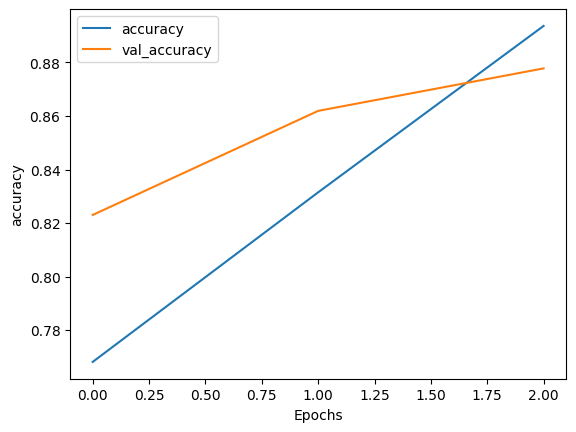

In [37]:
# Plot the training history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")

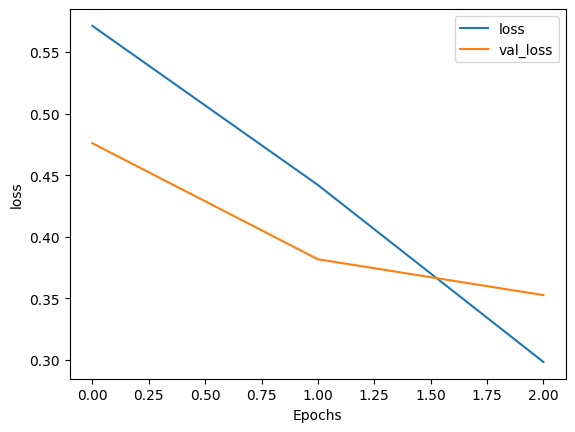

In [38]:
# Plot the training history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "loss")

In [47]:
## test model with predict one example sentence
sample_text = ["Boikot berhasil, Saham Mcdonalds dan Starbucks HANCUR!  "]
sample_seq = tokenizer.texts_to_sequences(sample_text)
sample_padded = pad_sequences(sample_seq, maxlen=max_length, truncating=trunc_type)
print(model.predict(sample_padded))

## convert predict to label
def get_label(predict):
    if predict == 2:
        return 'positive'
    if predict == 1:
        return 'negative'
    if predict == 0:
        return 'neutral'
    
print(get_label(np.argmax(model.predict(sample_padded))))    



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
[[0.59514534 0.26264843 0.14220622]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
neutral


In [40]:
from sklearn.metrics import classification_report

# Melakukan prediksi pada data uji
y_pred = model.predict(valid_padded)
y_pred_classes = np.argmax(y_pred, axis=1)

print (y_pred_classes.shape)
print (y_pred.shape)

# Mencetak classification report
print(classification_report(valid_df["label"], y_pred_classes))

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
(1260,)
(1260, 3)
              precision    recall  f1-score   support

           0       0.76      0.69      0.73       131
           1       0.83      0.87      0.85       394
           2       0.93      0.92      0.92       735

    accuracy                           0.88      1260
   macro avg       0.84      0.83      0.83      1260
weighted avg       0.88      0.88      0.88      1260



In [45]:
#save model
model.save('./model/model-cnn-word2vec-3-classes-no-stemming.h5')

In [100]:
import numpy as np
import tensorflow as tf

# Inisialisasi bobot kernel dengan ukuran 5
kernel_size = 5
num_filters = 1
embedding_dim = 8

# Membuat bobot kernel dengan inisialisasi Glorot uniform
initializer = tf.keras.initializers.GlorotUniform()
kernel_weights = initializer(shape=(kernel_size, embedding_dim, num_filters))

# Dibulatkan ke angka terdekat
kernel_weights_rounded = np.round(kernel_weights, decimals=2)

print("Bobot kernel dengan inisialisasi Glorot uniform (dibulatkan):")
print(kernel_weights_rounded)
print("Shape bobot kernel:", kernel_weights.shape)


Bobot kernel dengan inisialisasi Glorot uniform (dibulatkan):
[[[-0.19]
  [ 0.32]
  [ 0.33]
  [-0.01]
  [-0.2 ]
  [ 0.18]
  [-0.13]
  [ 0.36]]

 [[ 0.03]
  [-0.32]
  [-0.19]
  [-0.09]
  [-0.18]
  [-0.15]
  [-0.02]
  [-0.29]]

 [[-0.16]
  [-0.34]
  [-0.08]
  [-0.25]
  [-0.15]
  [ 0.28]
  [ 0.31]
  [ 0.17]]

 [[-0.2 ]
  [ 0.16]
  [ 0.36]
  [-0.21]
  [ 0.13]
  [-0.18]
  [ 0.31]
  [ 0.1 ]]

 [[ 0.35]
  [ 0.32]
  [ 0.13]
  [ 0.2 ]
  [-0.09]
  [-0.01]
  [ 0.07]
  [-0.17]]]
Shape bobot kernel: (5, 8, 1)
